## Load packages

In [1]:
suppressPackageStartupMessages(suppressWarnings(library('ggVennDiagram')))
suppressPackageStartupMessages(suppressWarnings(library('clusterProfiler')))
suppressPackageStartupMessages(suppressWarnings(library('pheatmap')))
suppressPackageStartupMessages(suppressWarnings(library('patchwork')))
suppressPackageStartupMessages(suppressWarnings(library('viridis')))
suppressPackageStartupMessages(suppressWarnings(library('limma')))
suppressPackageStartupMessages(suppressWarnings(library('ggplot2')))

## Set work directory

In [2]:
setwd('C:/Users/1010/Desktop/Data_ReadsCount/')

## Read matrix file

In [3]:
raw_count_filt_tpm <- read.csv('raw_mock_matrix.csv')
rownames(raw_count_filt_tpm) <- raw_count_filt_tpm$X
raw_count_filt_tpm <- raw_count_filt_tpm[,-1]
head(raw_count_filt_tpm)

,TSM1_TPM,TSM2_TPM,STB48M1_TPM,STB48M2_TPM,EVT48M1_TPM,EVT48M2_TPM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,24.136363,23.65776130,12.27902448,10.257407,18.27916172,18.5644194
ENSG00000000005,0.000000,0.00000000,0.15657900,0.000000,0.00000000,0.0000000
ENSG00000000419,38.624121,39.64715069,14.01878309,13.589263,31.26456354,33.5576604
ENSG00000000457,5.980368,5.51402275,3.99566492,3.369493,8.47834680,8.5401876
ENSG00000000460,8.273944,9.42440293,1.96140768,2.386031,7.78179443,7.1264078
ENSG00000000938,0.000000,0.03281305,0.04555699,0.000000,0.07485907,0.1116544


## Filtered the all zero row and scale TPM with log(TPM+1)

In [4]:
raw_count_filt_tpm<-raw_count_filt_tpm[which(rowSums(raw_count_filt_tpm) > 0),]
raw_count_filt_tpm<-log2(raw_count_filt_tpm+1)
head(raw_count_filt_tpm)

,TSM1_TPM,TSM2_TPM,STB48M1_TPM,STB48M2_TPM,EVT48M1_TPM,EVT48M2_TPM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,4.651704,4.62396992,3.7310773,3.492803,4.2689704,4.2901604
ENSG00000000005,0.000000,0.00000000,0.2098638,0.000000,0.0000000,0.0000000
ENSG00000000419,5.308307,5.34508232,3.9086960,3.866835,5.0118786,5.1109336
ENSG00000000457,2.803303,2.70354876,2.3206767,2.127466,3.2446354,3.2540176
ENSG00000000460,3.213183,3.38189285,1.5662831,1.759595,3.1345158,3.0226178
ENSG00000000938,0.000000,0.04657914,0.0642717,0.000000,0.1041475,0.1527084


## Convert all the gene name from ENSEMBL to SYMBOL

In [5]:
SymbolList <- bitr(rownames(raw_count_filt_tpm),fromType = 'ENSEMBL', toType = 'SYMBOL','org.Hs.eg.db',drop=F)
raw_count_filt_tpm$ENSEMBL <- rownames(raw_count_filt_tpm)
SymbolMatrix <- merge(raw_count_filt_tpm,SymbolList,by='ENSEMBL')     
SymbolMatrix <- avereps(SymbolMatrix[,-length(rownames(SymbolMatrix))],ID=SymbolMatrix$SYMBOL)
SymbolMatrix <- as.data.frame(SymbolMatrix,stringsAsFactors = FALSE)
# length(SymbolMatrix)
SymbolMatrix <- na.omit(SymbolMatrix)
rownames(SymbolMatrix) <- SymbolMatrix$SYMBOL
# head(SymbolMatrix)
SymbolMatrix <- SymbolMatrix[,-length(colnames(SymbolMatrix))]
SymbolMatrix <- SymbolMatrix[,-1]
# SymbolMatrix$Symbol <- rownames(SymbolMatrix)
head(SymbolMatrix)
SymbolMatrixNu<-apply(SymbolMatrix,2,as.numeric)
SymbolMatrixNu<-as.data.frame(SymbolMatrixNu)
rownames(SymbolMatrixNu) <- rownames(SymbolMatrix)



'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(raw_count_filt_tpm), fromType = "ENSEMBL", toType = "SYMBOL", :
"34.55% of input gene IDs are fail to map..."


,TSM1_TPM,TSM2_TPM,STB48M1_TPM,STB48M2_TPM,EVT48M1_TPM,EVT48M2_TPM
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TSPAN6,4.651704014,4.623969917,3.731077260,3.492803e+00,4.268970418,4.290160390
TNMD,0.000000000,0.000000000,0.209863811,0.000000e+00,0.000000000,0.000000000
DPM1,5.308307016,5.345082320,3.908696017,3.866835e+00,5.011878604,5.110933645
SCYL3,2.803303008,2.703548759,2.320676711,2.127466e+00,3.244635447,3.254017633
C1orf112,3.213182971,3.381892849,1.566283110,1.759595e+00,3.134515764,3.022617756
FGR,0.000000000,0.046579136,0.064271698,0.000000e+00,0.104147511,0.152708378


## Rank all genes with TPM

In [6]:
takeOrderList <- function(a){
   orderlist <- rownames(SymbolMatrixNu[order(a,decreasing = T),])
}

rankList <- function(a){
  selectgene <- a[1:as.integer(length(a)*1)]
}

combineGeneList <- function(a){
  union(geneCollection,a)
}

test<-apply(SymbolMatrixNu,2,takeOrderList)
ranktest <- apply(test,2,rankList)
ranktest <- as.data.frame(ranktest)
geneCollection = vector()
Genelist <- union(union(union(union(union(ranktest$TSM1_TPM,ranktest$TSM2_TPM),ranktest$STB48M1_TPM),
                        ranktest$STB48M2_TPM),
                  ranktest$EVT48M1_TPM),
                  ranktest$EVT48M2_TPM)


## Read the ISG genes

In [7]:
selectlist <- read.csv('filtered_list.csv',header = F)$V1

## Find the intersect genes between ISG genes and all gene

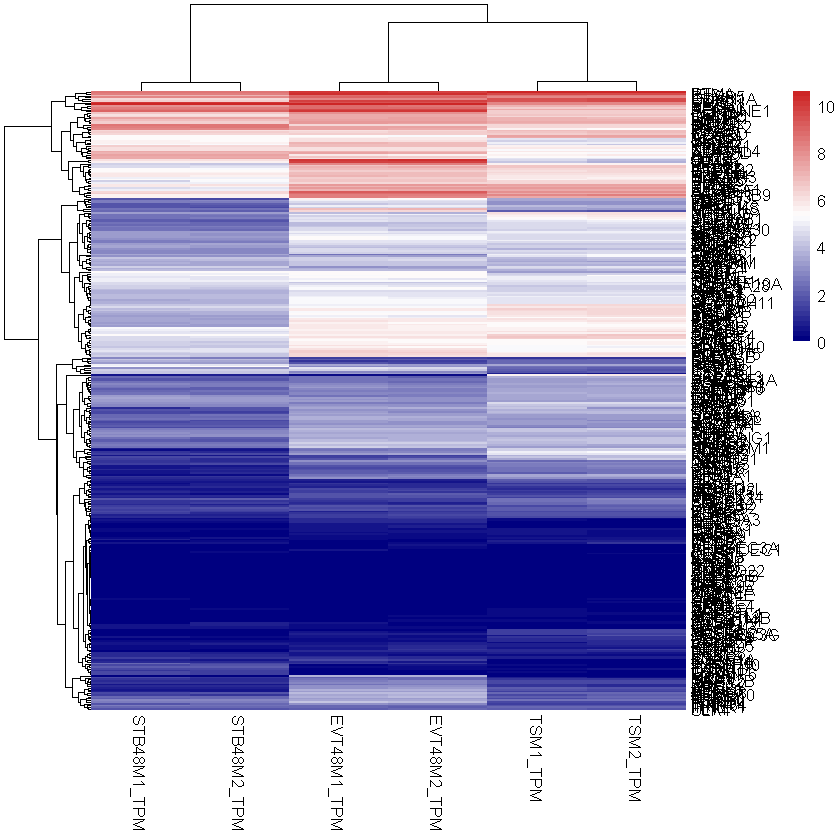

In [8]:
expList <- intersect(Genelist,selectlist)

plotMatrix <- SymbolMatrixNu[na.omit(match(expList,rownames(SymbolMatrixNu))),]
p <- pheatmap(plotMatrix, scale = 'none',show_rownames = T,cluster_cols = T, cluster_rows = T, color = colorRampPalette(c("Navy", "white", "Firebrick3"))(50))
mat_cluster <- plotMatrix[p$tree_row$order,p$tree_col$order]

mat_scale <- round(t(apply(plotMatrix, 1, scale)),2)
colnames(mat_scale) <- colnames(plotMatrix)
mat_cluster_scale <- as.data.frame(mat_scale)[p$tree_row$order, p$tree_col$order]

# head(mat_cluster)

In [9]:
dim(mat_cluster)

[1] 354   6

## Judged by the expression level of marker gene HLA-G, TPM > 53 was set as a criterion to evaluate the intrinsic expression level of ISGs in hTSC-derived trophoblast cells

In [10]:
TSMExpressJudge <- rownames(subset(plotMatrix,TSM1_TPM>log2(53)|TSM2_TPM>log2(53)))
STBExpressJudge <- rownames(subset(plotMatrix,STB48M1_TPM>log2(53)|STB48M2_TPM>log2(53)))
EVTExpressJudge <- rownames(subset(plotMatrix,EVT48M1_TPM>log2(53)|EVT48M1_TPM>log2(53)))

## Calculate the overlapping set of intrinsically highly expressed ISGs in hTSCs and hTSC-derived STBTS and EVTTS

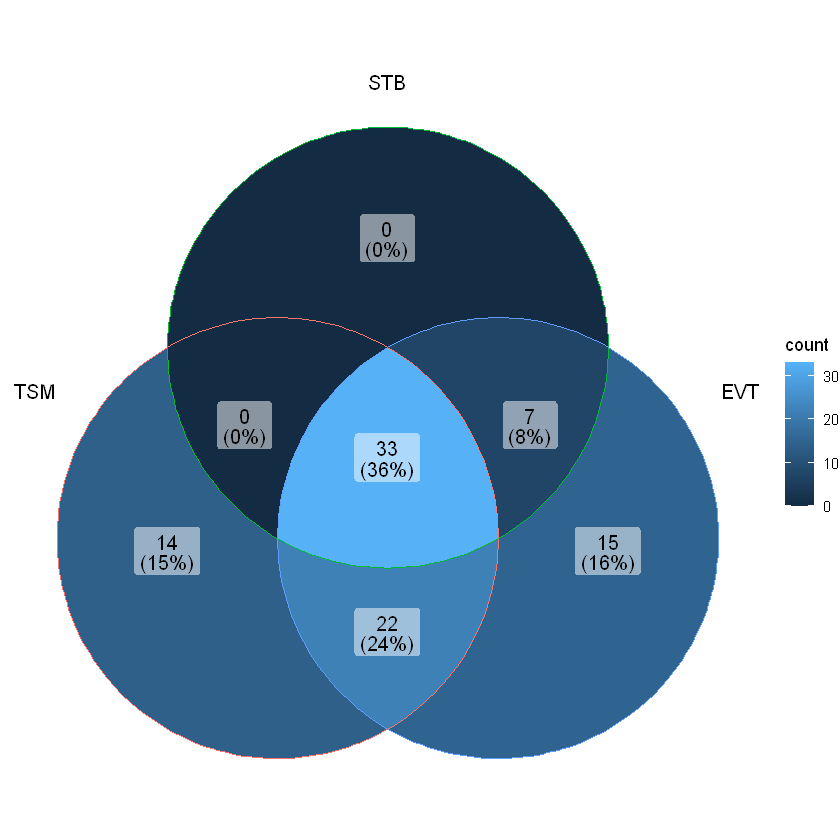

In [11]:
intersectAll <- intersect(intersect(TSMExpressJudge,STBExpressJudge),EVTExpressJudge)
intersectSTBEVT <- intersect(STBExpressJudge,EVTExpressJudge)
intersectTSMEVT <- intersect(TSMExpressJudge,EVTExpressJudge)
intersectTSMSTB <- intersect(TSMExpressJudge,STBExpressJudge)

library(ggVennDiagram)
library(ggplot2)
library(patchwork)
library(viridis)
# plotList <- list("TSM"=HighExpressTSM,"STB"=HighExpressSTB,"EVT"=HighExpressEVT)
plotList <- list("TSM"=TSMExpressJudge,"STB"=STBExpressJudge,"EVT"=EVTExpressJudge)
p <- ggVennDiagram(plotList,label = c('both'))
p

write.csv(TSMExpressJudge,'HighExpressTSM.csv')
write.csv(STBExpressJudge,'HighExpressSTB.csv')
write.csv(EVTExpressJudge,'HighExpressEVT.csv')
# write.csv(intersectAll,'intersectAll.csv')
# write.csv(intersectSTBEVT,'intersectSTBEVT.csv')
# write.csv(intersectTSMEVT,'intersectTSMEVT.csv')
# write.csv(intersectTSMSTB,'intersectTSMSTB.csv')


## Plot heatmap of the high expressed genes

In [14]:
genelist <- read.csv('genelist.csv',header = F)$V1

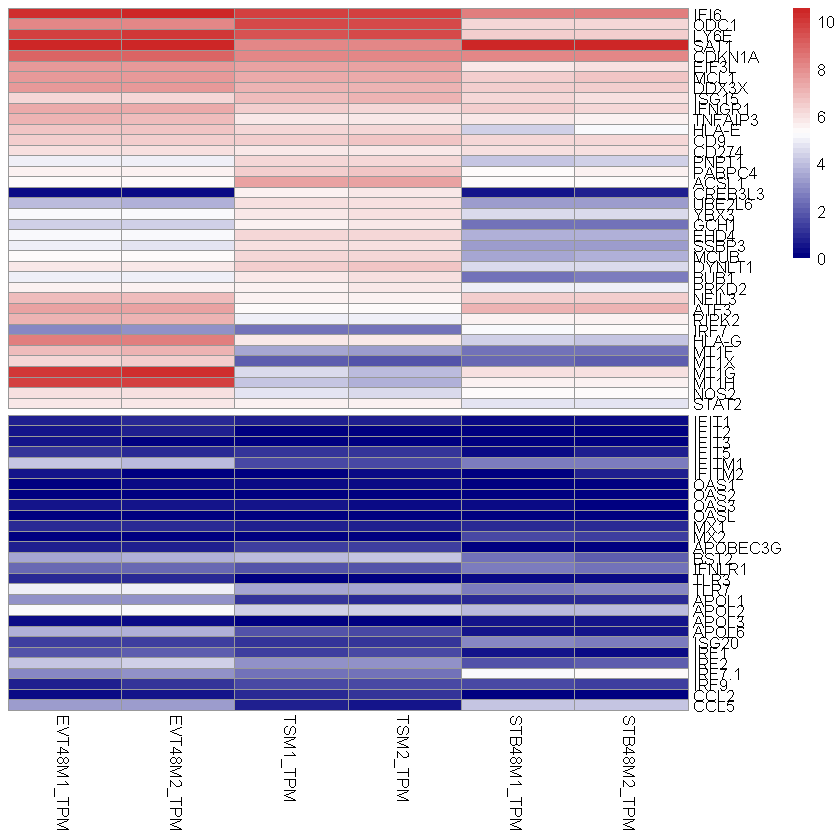

In [15]:
mat_cluster <- mat_cluster[,c(5,6,1,2,3,4)]
IDOrder <- read.csv('genelist.csv',header = F)$V1
plotOrder <- mat_cluster[match(IDOrder,rownames(mat_cluster)),]
p <- pheatmap(plotOrder, scale = 'none',show_rownames = T,cluster_cols = F, cluster_rows = F, color = colorRampPalette(c("Navy", "white", "Firebrick3"))(50),gaps_row = 38)
